IMPORT THE LIBRIRES



In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

TO READ THE CSV FILE

In [2]:
data = pd.read_csv("C:/Users/NAVEEN/Downloads/individual+household+electric+power+consumption.zip",delimiter=";",compression="zip",low_memory=False)

TO VIEW THE TOP 5 ROWS IN THE DATASET(USING HEAD FUNCTIONS)

In [3]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


TO VIEW THE LAST 5 ROWS IN THE DATASET(USING TAIL FUNCTIONS)

In [4]:
data.tail(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


***Columns and Their Meanings:***
-
>Date

>Type: String (dd/mm/yyyy format)

Meaning: The calendar date when the measurement was taken.

>Time

>Type: String (hh:mm:ss format)

Meaning: The exact time of day when the measurement was recorded.

>Global_active_power

>Type: Float (kilowatts)

Meaning: The total active power consumed in the household, i.e., the actual power used for electrical work like lighting, heating, and appliances.

>Global_reactive_power

>Type: Float (kilowatts)

Meaning: The reactive power consumed — it doesn't perform any useful work but is necessary to maintain the voltage levels (used by motors and inductors).

>Voltage

>Type: Float (volts)

Meaning: The electric potential difference between the live and neutral wires.

>Global_intensity

>Type: Float (amperes)

Meaning: The total current (amperage) drawn by the household at the time of measurement.

>Sub_metering_1

>Type: Float (watt-hours)

Meaning: Energy sub-metered for Kitchen appliances — dishwasher, oven, microwave.

>Sub_metering_2

>Type: Float (watt-hours)

Meaning: Energy sub-metered for Laundry Room appliances — washing machine, dryer, refrigerator, etc.

>Sub_metering_3

>Type: Float (watt-hours)

Meaning: Energy sub-metered for Water heater and air conditioner.



TO FIND THE NUMBER OF ROWS AND CLOUMNS IN DATASET(USING SHAPE FUCNTION)

In [5]:
data.shape

(2075259, 9)

NUMBER OF ROWS IS 2072259 AND CLOUMNS IS 9

TO FIND THE INFORMATION OF THE DATASET(USING INFO METHOD)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### 🔍 Hint:
- FROM THIS DATASET WE HAVE **1 NUMERICAL** AND **7 OBJECT (STRING) COLUMNS**.
- WE HAVE TO CONVERT **6 OBJECT COLUMNS** TO NUMERICAL FOR FEATURE ANALYSIS.
- SO, WE **ADD 6 COLUMNS INTO A LIST** AND USE A `FOR` LOOP TO ITERATE OVER EACH COLUMN.


In [7]:
# create the list
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']


#using for loop to iterate each cloumn and using errors = coerece is to avoid the error and it will replace NAN
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')  


AFTER CONVERTING THE COLUMN WE HAVE AGAIN THE CHECK INFORMATION

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


"""

- NOW ALL THE COLUMNS ARE CONVERTED TO NUMERICAL (CONTINUOUS) EXCEPT DATE AND TIME COLUMN.
- NOW WE CAN CONVERT THE **DATE AND TIME COLUMN** INTO DATETIME FORMAT USING DATETIME FUNCTIONS.
"""



In [9]:
# To convert the date & time column object in datetime formate
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')

# TO convert the time cloumn object into time 
data["Time"] = pd.to_datetime(data["Time"], format='%H:%M:%S').dt.time


NOW WE CAN ADD SOME MORE CLOUMN **DAY,MONTH AND YEAR** FROM THE DATE CLOUMN FOR FEATURE ANALYSIS


In [10]:
# Add the day cloumn from date cloumn
data["day"] = data["Date"].dt.day

# Add the month cloumn from date cloumn
data["month"] = data["Date"].dt.month

# Add the year cloumn from date cloumn
data["year"] = data["Date"].dt.year

### 🔍 Hint:
- The **Before we can do without change the type of cloumn it shows some duplicate values based on **DATE and TIME cloumn in the type of datatime.
- But the nature of dataset have no duplicate  but  it shows duplicate  **as in the type datetime format**.
- so we can convert data type **datetime into integer** .


In [11]:
# Now we can convert date cloumn datetime into integer for machine learning model
data["Date"] = data["Date"].dt.strftime("%Y%m%d").astype(int)  

 #Now we can convert time cloumn time into integer for machine learning model
data["Time"] = pd.to_datetime(data["Time"], format="%H:%M:%S").dt.strftime("%H%M%S").astype(int)  # Convert to HHMMSS integer


TO INDENFIY THE DUPLICATES IN DATASET

In [12]:
data[data.duplicated()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year


***NO DUPLICATED IS FOUND IN DATASET***

AGAIN WE CAN CHECK THE INFORMATION OF DATASET FOR ALL CLOUMN ARE CONVERT PROPERLY

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   int64  
 1   Time                   int64  
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
 9   day                    int32  
 10  month                  int32  
 11  year                   int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 166.2 MB


***TO CHECK ANY NULL VALUES ***

In [14]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
day                          0
month                        0
year                         0
dtype: int64

***-TO CHECK NULL VALUES BASED ON PERCENTAGE FOR EACH CLOUMN***

In [15]:


# Calculate missing values percentage for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame for better readability
missing_df = pd.DataFrame({'Column Name': data.columns, 'Missing %': missing_percentage})

# Sort by highest missing percentage
missing_df = missing_df.sort_values(by="Missing %", ascending=False)

# Display result
print(missing_df)


                                 Column Name  Missing %
Global_reactive_power  Global_reactive_power   1.251844
Global_active_power      Global_active_power   1.251844
Global_intensity            Global_intensity   1.251844
Voltage                              Voltage   1.251844
Sub_metering_3                Sub_metering_3   1.251844
Sub_metering_2                Sub_metering_2   1.251844
Sub_metering_1                Sub_metering_1   1.251844
Time                                    Time   0.000000
Date                                    Date   0.000000
day                                      day   0.000000
month                                  month   0.000000
year                                    year   0.000000


FILLING  NAN VALUES WITH IMPUTATION METHOD (MEAN)

GETTING ALL MEAN VALUES FOR EACH NAN VALUES CLOUMN

In [16]:
# Calculate mean for columns with missing values
active_power= data["Global_active_power"].mean()
reactive_power = data["Global_reactive_power"].mean()
voltage = data["Voltage"].mean()
Global_intensity= data["Global_intensity"].mean()
sub_1 = data["Sub_metering_1"].mean()
sub_2 = data["Sub_metering_2"].mean()
sub_3 = data["Sub_metering_3"].mean()


**TO APPLY THE IMPUTATION METHOD FOR EACH NAN VALUES IN CLOUMNS**

In [17]:
# Apply imputation
data["Global_active_power"].fillna(active_power,inplace=True)
data["Global_reactive_power"].fillna(reactive_power,inplace=True)
data["Global_intensity"].fillna(Global_intensity,inplace=True)
data["Voltage"].fillna(voltage,inplace=True)
data["Sub_metering_1"].fillna(sub_1,inplace=True)
data["Sub_metering_2"].fillna(sub_2,inplace=True)
data["Sub_metering_3"].fillna(sub_3,inplace=True)

NOW ALL NAN VALUES CLEARED 

In [18]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
year                     0
dtype: int64

***EDA (VISULAZAITION & FEATURE ANALYSIS) PART***

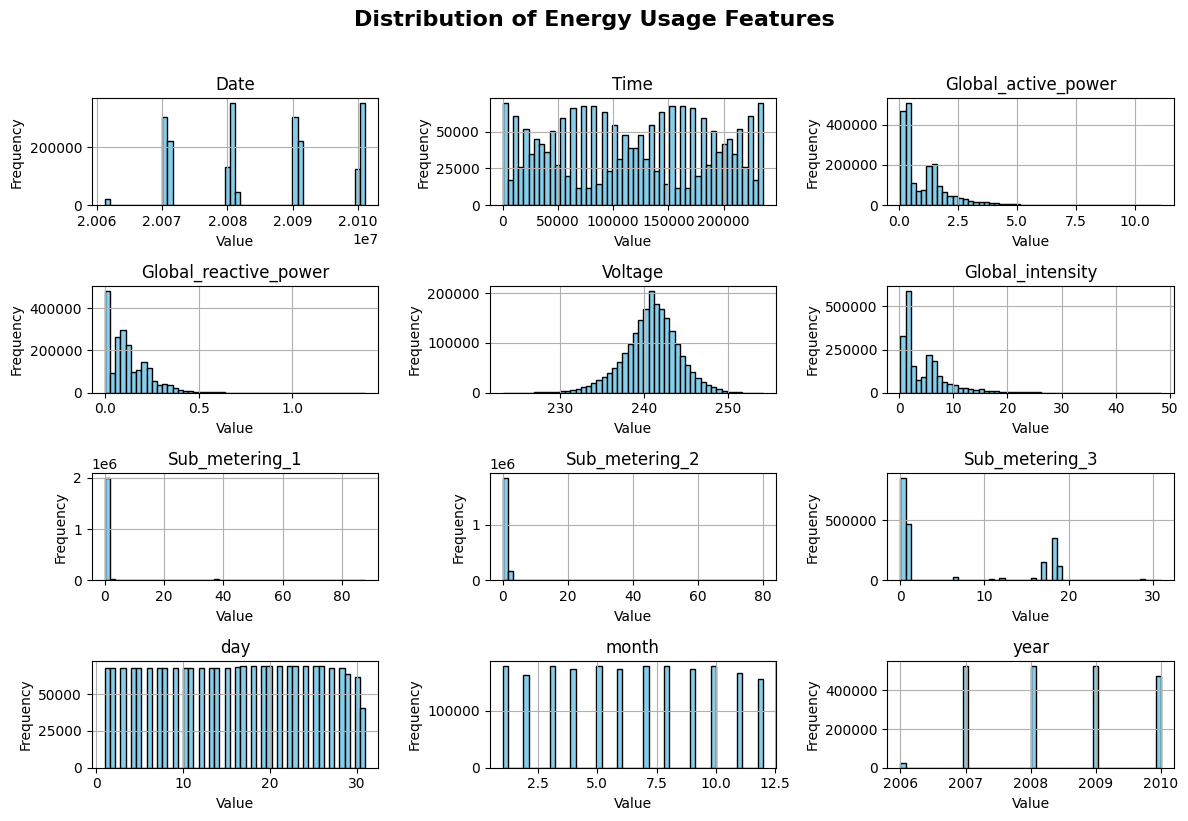

In [19]:
# Create histograms
axes = data.hist(figsize=(12, 8), bins=50, color='skyblue', edgecolor='black')

# Loop through each subplot and add labels
for ax in axes.flatten():
    ax.set_xlabel("Value")  # X-axis label
    ax.set_ylabel("Frequency")  # Y-axis label
    ax.set_title(ax.get_title())  # Keep original title
# Add a main title for the entire figure
plt.suptitle("Distribution of Energy Usage Features", fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


### 🔍 Hint:
- The **Global Active Power and global reactive power** has a **high impact**.
- The distribution is **right-skewed**, meaning there are more lower values and a few high values.
- so we can Consider  **To normalize the data** .


- The **Voltage have  Normally distributed centered around 240V** .
- Voltage values are stable and normally distributed .
- Action: No major transformation needed .

***Sub-metering (1, 2, 3)***
-
>These can help in appliance-level energy forecasting.

-All show a strong spike at zero, meaning many readings recorded no consumption for those zones at the time.

-Some noticeable non-zero values indicate usage bursts in:

-Kitchen (Sub_metering_1)

-Laundry Room (Sub_metering_2)

-Water Heater & A/C (Sub_metering_3)



***check the count values for all the cloumns**


In [20]:
# Loop through all float-type columns and print their value counts
for col in data.columns:
    print(f"Value Counts for {col}:\n", data[col].value_counts(),"\n")


Value Counts for Date:
 Date
20101125    1440
20101109    1440
20101108    1440
20101107    1440
20101106    1440
            ... 
20061219    1440
20061218    1440
20061217    1440
20101126    1263
20061216     396
Name: count, Length: 1442, dtype: int64 

Value Counts for Time:
 Time
202400    1442
204700    1442
204800    1442
204900    1442
205000    1442
          ... 
170300    1441
170400    1441
170500    1441
170600    1441
170700    1441
Name: count, Length: 1440, dtype: int64 

Value Counts for Global_active_power:
 Global_active_power
1.091615    25979
0.218000     9565
0.216000     9363
0.322000     9350
0.324000     9304
            ...  
7.316000        1
8.622000        1
8.436000        1
8.318000        1
7.170000        1
Name: count, Length: 4187, dtype: int64 

Value Counts for Global_reactive_power:
 Global_reactive_power
0.000000    481561
0.123714     25979
0.100000     21902
0.092000     21841
0.098000     21812
             ...  
1.364000         1
1.102000   

***To identify the outlier using boxplot for Each cloumns***
-

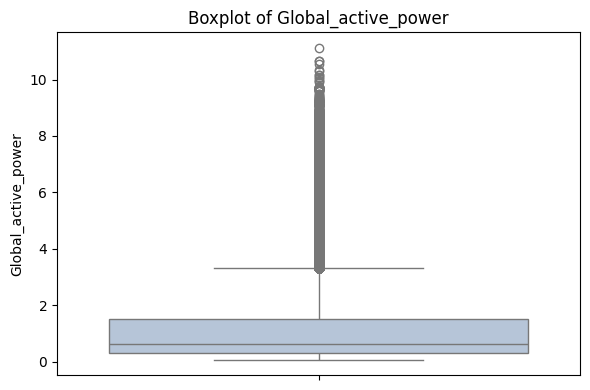

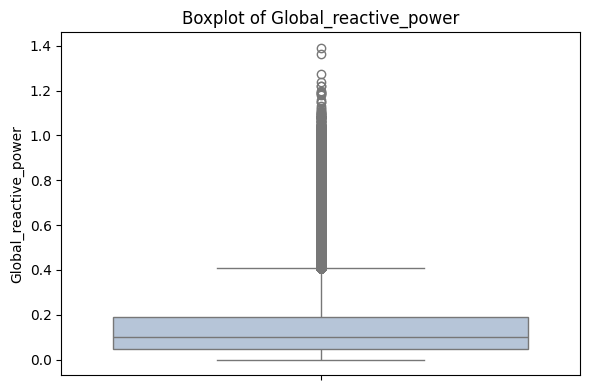

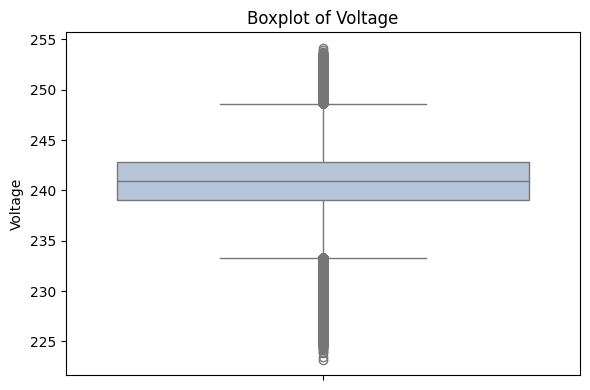

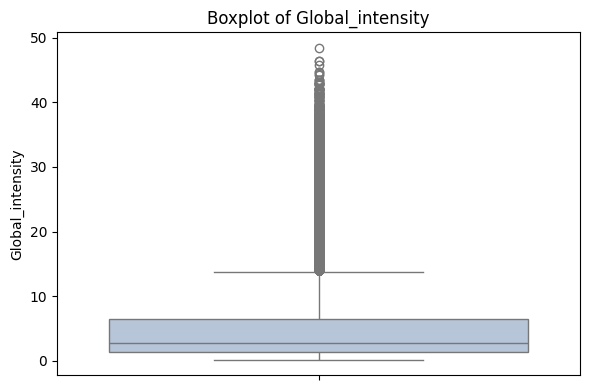

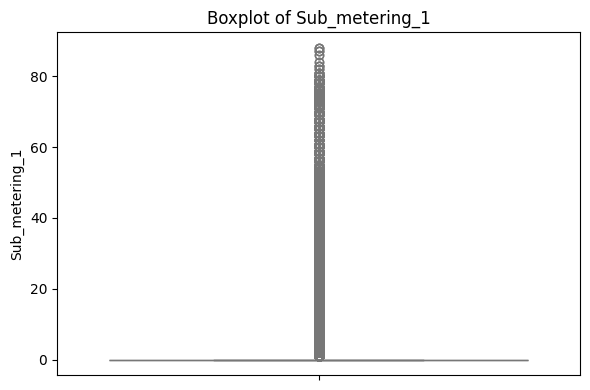

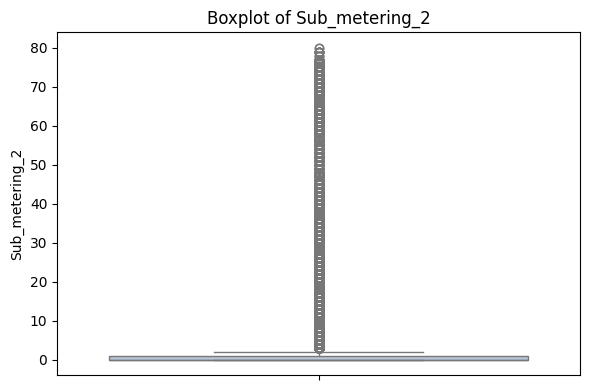

In [21]:
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

# Create separate box plots for each numerical column
for col in cols_to_convert :
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col], color='lightsteelblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

***To identify the outlier using boxplot for Entire dataset***
-

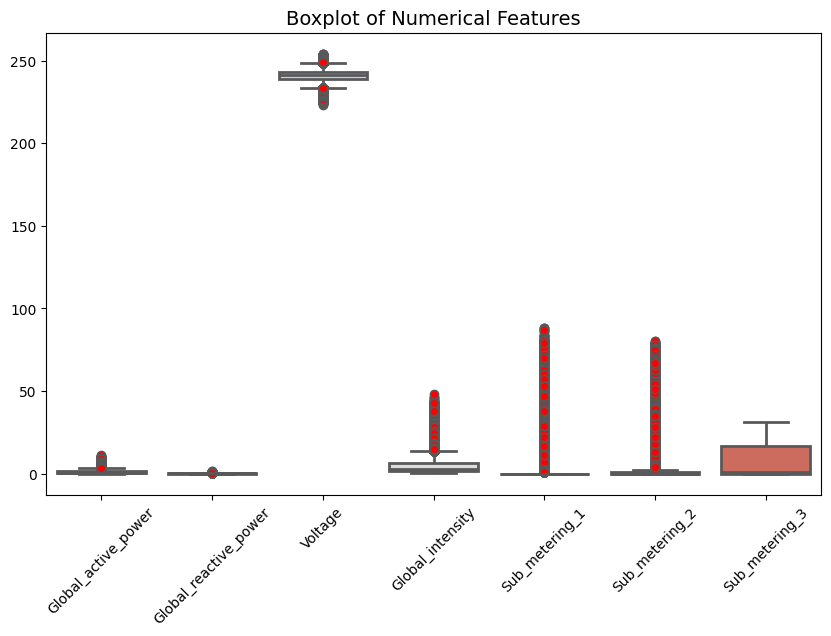

In [22]:

# Set figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for all float-type columns
sns.boxplot(
    data=data.select_dtypes(include=['float']),  # Pass actual data, not column names
    palette="coolwarm",  # Set color scheme
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 6},  # Customize outliers
    linewidth=2  # Make lines thicker
)

# Add title and labels
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


***Detect outliers using IQR***
-

**To detect outliers for global active power (features)**


In [23]:
# Step 1: Calculate the 1st quartile (25th percentile)
Q1 = data["Global_active_power"].quantile(0.25)  
# Hint: Q1 represents the value below which 25% of the data falls.

# Step 2: Calculate the 3rd quartile (75th percentile)
Q3 = data["Global_active_power"].quantile(0.75)  
# Hint: Q3 represents the value below which 75% of the data falls.

# Step 3: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  
# Hint: IQR measures the spread of the middle 50% of the data (Q3 - Q1).

# Step 4: Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR  
# Hint: Any value below this is considered an outlier.

# Step 5: Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR  
# Hint: Any value above this is considered an outlier.

# Step 6: Identify outliers in the "Global_active_power" column
global_active_power_outliers = data[(data["Global_active_power"] < lower_bound) | (data["Global_active_power"] > upper_bound)]  
# Hint: Filters data where values are either below the lower bound or above the upper bound.

# Step 7: Print the detected outliers
print(global_active_power_outliers)  
# Hint: Displays all rows in which "Global_active_power" is an outlier.

# Step 8: Print the total count of outliers
print(f"NUMBER OF OUTLIERS FOR Global_active_power: {global_active_power_outliers.shape[0]}")  
# Hint: Counts the number of rows in the outlier dataset using .shape[0].





             Date    Time  Global_active_power  Global_reactive_power  \
0        20061216  172400                4.216                  0.418   
1        20061216  172500                5.360                  0.436   
2        20061216  172600                5.374                  0.498   
3        20061216  172700                5.388                  0.502   
4        20061216  172800                3.666                  0.528   
...           ...     ...                  ...                    ...   
2074573  20101126   93700                3.632                  0.064   
2074574  20101126   93800                3.616                  0.062   
2074575  20101126   93900                3.632                  0.064   
2074576  20101126   94000                3.552                  0.064   
2074577  20101126   94100                3.552                  0.064   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0   

**To detect outliers for global REactive power (features)**


In [24]:
# Step 1: Calculate the 1st quartile (25th percentile)
Q1 = data["Global_reactive_power"].quantile(0.25)  
# Hint: Q1 (25th percentile) is the value below which 25% of the data falls.

# Step 2: Calculate the 3rd quartile (75th percentile)
Q3 = data["Global_reactive_power"].quantile(0.75)  
# Hint: Q3 (75th percentile) is the value below which 75% of the data falls.

# Step 3: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  
# Hint: IQR (Q3 - Q1) represents the middle 50% range of the dataset.

# Step 4: Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR  
# Hint: Any value below this threshold is considered a **low outlier**.

# Step 5: Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR  
# Hint: Any value above this threshold is considered a **high outlier**.

# Step 6: Identify outliers in the "Global_reactive_power" column
Global_reactive_power_outliers = data[(data["Global_reactive_power"] < lower_bound) | (data["Global_reactive_power"] > upper_bound)]  
# Hint: Filters data where "Global_reactive_power" is either **too low** or **too high** based on the IQR rule.

# Step 7: Print the detected outliers
print(Global_reactive_power_outliers)  
# Hint: Displays all rows that have outliers in "Global_reactive_power".

# Step 8: Print the total count of outliers
print(f"NUMBER OF OUTLIERS FOR Global_reactive_power: {Global_reactive_power_outliers.shape[0]}")  
# Hint: Counts the number of outlier rows using `.shape[0]`.


             Date    Time  Global_active_power  Global_reactive_power  \
0        20061216  172400                4.216                  0.418   
1        20061216  172500                5.360                  0.436   
2        20061216  172600                5.374                  0.498   
3        20061216  172700                5.388                  0.502   
4        20061216  172800                3.666                  0.528   
...           ...     ...                  ...                    ...   
2074895  20101126  145900                2.226                  0.690   
2074896  20101126  150000                2.240                  0.696   
2074967  20101126  161100                0.804                  0.428   
2074968  20101126  161200                0.930                  0.426   
2075006  20101126  165000                1.676                  0.416   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0   

**To detect outliers for sub_metering_1 (features)**


In [25]:
# Step 1: Calculate the 1st quartile (25th percentile)
Q1 = data["Sub_metering_1"].quantile(0.25)  
# Hint: Q1 represents the value below which 25% of the "Sub_metering_1" data falls.

# Step 2: Calculate the 3rd quartile (75th percentile)
Q3 = data["Sub_metering_1"].quantile(0.75)  
# Hint: Q3 represents the value below which 75% of the "Sub_metering_1" data falls.

# Step 3: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  
# Hint: IQR (Q3 - Q1) represents the middle 50% of the data and helps detect outliers.

# Step 4: Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR  
# Hint: Any value **below** this threshold is considered a **low outlier**.

# Step 5: Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR  
# Hint: Any value **above** this threshold is considered a **high outlier**.

# Step 6: Identify outliers in the "Sub_metering_1" column
Sub_metering_1_outliers = data[(data["Sub_metering_1"] < lower_bound) |  (data["Sub_metering_1"] > upper_bound)]  
# Hint: Filters data where "Sub_metering_1" values fall outside the lower and upper bounds.

# Step 7: Print the detected outliers
print(Sub_metering_1_outliers)  
# Hint: Displays all rows that contain outliers in "Sub_metering_1".

# Step 8: Print the total count of outliers
print(f"NUMBER OF OUTLIERS FOR Sub_metering_1: {Sub_metering_1_outliers.shape[0]}")  
# Hint: Counts the number of outlier rows using `.shape[0]`.


             Date    Time  Global_active_power  Global_reactive_power  \
1019     20061217  102300                2.242                  0.162   
1020     20061217  102400                3.714                  0.296   
1021     20061217  102500                3.212                  0.304   
1022     20061217  102600                3.694                  0.280   
1023     20061217  102700                3.204                  0.292   
...           ...     ...                  ...                    ...   
2074575  20101126   93900                3.632                  0.064   
2074576  20101126   94000                3.552                  0.064   
2074577  20101126   94100                3.552                  0.064   
2074578  20101126   94200                1.772                  0.054   
2074583  20101126   94700                1.296                  0.052   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1019      237.33              10.0             1.0   

**To detect outliers for sub_metering_2 (features)**


In [53]:
# Step 1: Calculate the 1st quartile (25th percentile)
Q1 = data["Sub_metering_2"].quantile(0.25)  
# Hint: Q1 represents the value below which 25% of the "Sub_metering_2" data falls.

# Step 2: Calculate the 3rd quartile (75th percentile)
Q3 = data["Sub_metering_2"].quantile(0.75)  
# Hint: Q3 represents the value below which 75% of the "Sub_metering_2" data falls.

# Step 3: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  
# Hint: IQR (Q3 - Q1) represents the middle 50% of the data and helps detect outliers.

# Step 4: Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR  
# Hint: Any value **below** this threshold is considered a **low outlier**.

# Step 5: Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR  
# Hint: Any value **above** this threshold is considered a **high outlier**.

# Step 6: Identify outliers in the "Sub_metering_2" column
Sub_metering_2_outliers = data[(data["Sub_metering_2"] < lower_bound) | (data["Sub_metering_2"] > upper_bound)]  
# Hint: Filters data where "Sub_metering_2" values fall outside the lower and upper bounds.

# Step 7: Print the detected outliers
print(Sub_metering_2_outliers)  
# Hint: Displays all rows that contain outliers in "Sub_metering_2".

# Step 8: Print the total count of outliers
print(f"NUMBER OF OUTLIERS FOR Sub_metering_2: {Sub_metering_2_outliers.shape[0]}")  
# Hint: Counts the number of outlier rows using `.shape[0]`.


             Date      Time  Global_active_power  Global_reactive_power  \
39      -2.114414  0.900330             2.520698              -0.140290   
40      -2.114414  0.901774             3.651421               0.698889   
41      -2.114414  0.903218             4.721230               0.609615   
42      -2.114414  0.904663             5.387481               0.556050   
43      -2.114414  0.906107             5.122884               0.181098   
...           ...       ...                  ...                    ...   
2072184  1.429443  0.820901            -0.296591              -1.104454   
2072185  1.429443  0.822345            -0.330855              -1.104454   
2072186  1.429443  0.823789            -0.220448              -0.390258   
2072187  1.429443  0.825233            -0.260423              -0.372404   
2072188  1.429443  0.826677            -0.220448              -0.104580   

          Voltage  Sub_metering_1  Sub_metering_2  Sub_metering_3  day  month  
39      -1.214377  

**To detect outliers for sub_metering_3 (features)**


In [27]:
# Step 1: Calculate the 1st quartile (25th percentile)
Q1 = data["Sub_metering_3"].quantile(0.25)  
# Hint: Q1 represents the value below which 25% of the "Sub_metering_3" data falls.

# Step 2: Calculate the 3rd quartile (75th percentile)
Q3 = data["Sub_metering_3"].quantile(0.75)  
# Hint: Q3 represents the value below which 75% of the "Sub_metering_3" data falls.

# Step 3: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  
# Hint: IQR (Q3 - Q1) represents the middle 50% of the data and helps detect outliers.

# Step 4: Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR  
# Hint: Any value **below** this threshold is considered a **low outlier**.

# Step 5: Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR  
# Hint: Any value **above** this threshold is considered a **high outlier**.

# Step 6: Identify outliers in the "Sub_metering_3" column
Sub_metering_3_outliers = data[
    (data["Sub_metering_3"] < lower_bound) | 
    (data["Sub_metering_3"] > upper_bound)
]  
# Hint: Filters data where "Sub_metering_3" values fall outside the lower and upper bounds.

# Step 7: Print the detected outliers
print(Sub_metering_3_outliers)  
# Hint: Displays all rows that contain outliers in "Sub_metering_3".

# Step 8: Print the total count of outliers
print(f"NUMBER OF OUTLIERS FOR Sub_metering_3: {Sub_metering_3_outliers.shape[0]}")  
# Hint: Counts the number of outlier rows using `.shape[0]`.


Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, day, month, year]
Index: []
NUMBER OF OUTLIERS FOR Sub_metering_3: 0


***SCALING THE CLOUMNS***
-

In [28]:
#Add the cloumns that to scaled
columns_to_scale = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only to selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


***TO IDENTIFY THE RELATIONSHIP BEWEEN FEATURES (CORRELATION ANALYSIS)***
-

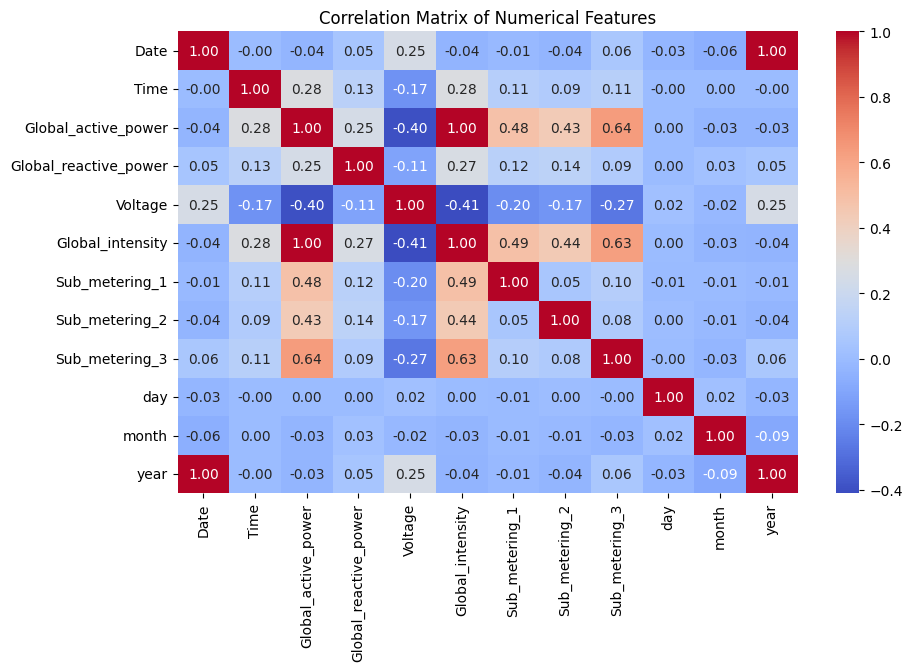

In [29]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


🔹 Insights from the Correlation Matrix
The heatmap displays the correlation between numerical features. Here are some key takeaways:

>Strong Correlations:

***Global_active_power and Global_intensity (1.00) → Highly correlated (almost identical) and  date and year also (1.00) → Highly correlated (almost identical)***.

-Global_active_power and Sub_metering_3 (0.64) → Moderate positive correlation.
-Global_intensity and Sub_metering_3 (0.63) → Moderate positive correlation.
Negative Correlations:

Global_active_power and Voltage (-0.40) → As voltage increases, active power decreases.
Global_intensity and Voltage (-0.41) → More intensity usage is associated with lower voltage.
Low or No Correlation:

Date-related columns (day, month, year) have very low correlation with other variables.
Global_reactive_power has weak correlations overall.


In [30]:
# from this correlation we can drop the cloumns global intenstiy and year
data.drop(columns=['Global_intensity','year'], inplace=True)


**Now we can split the cloumn for Target and Features**
-

In [31]:

#Features cloumn
X = data.drop(columns=["Global_active_power"]) 

# Target cloumn
y = data["Global_active_power"]

# We can split the data for Traning and testing (80%-Traning and 20%-Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***IMPLEMENT THE LINEAR REGRESSION MODEL***
-

In [32]:
# Linear Regression (implement the model)
lr_model = LinearRegression()

# we have to fit the model(model to be learning the pattern)
lr_model.fit(X_train, y_train)



LinearRegression()

***Model will predict based on train and test data***
-

In [33]:
#model will predict the training data
tr_pred = lr_model.predict(X_train)

#model will predict the testing data
ts_pred = lr_model.predict(X_test)

***# error metrices for linear model training data**
-

In [34]:
# error metrices for training data
MAE_TR=mean_squared_error( y_train,tr_pred )
RMAE_TR= root_mean_squared_error( y_train,tr_pred )
r2_SCORE_TR = r2_score(y_train,tr_pred)
MODEL_SCORE_TR = lr_model.score(X_train,y_train)
print(f"ERROR METRICS FOR TRAINING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TRAINING DATA: {MAE_TR}\n"
      f"ROOT MEAN SQUARED ERROR FOR TRAINING DATA: {RMAE_TR}\n"
      f"R² SCORE FOR TRAINING DATA: {r2_SCORE_TR}\n"
      f"MODEL SCORE FOR TRAINING DATA: {MODEL_SCORE_TR}")


ERROR METRICS FOR TRAINING DATA:
MEAN ABSOLUTE ERROR FOR TRAINING DATA: 0.24507916267477153
ROOT MEAN SQUARED ERROR FOR TRAINING DATA: 0.49505470674943747
R² SCORE FOR TRAINING DATA: 0.7548925944587319
MODEL SCORE FOR TRAINING DATA: 0.7548925944587319


***error metrices for linear model testing data***
-

In [35]:
# error metrices for testing data
MAE_TS=mean_squared_error( y_test,ts_pred )
RMAE_TS=root_mean_squared_error( y_test,ts_pred )
r2_SCORE_TS = r2_score(y_test,ts_pred)
MODEL_SCORE_TS = lr_model.score(X_test,y_test)
print(f"ERROR METRICS FOR TESTING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TESTING DATA: {MAE_TS}\n"
      f"ROOT MEAN SQUARED ERROR FOR TESTING DATA: {RMAE_TS}\n"
      f"R² SCORE FOR TESTING DATA: {r2_SCORE_TS}\n"
      f"MODEL SCORE FOR TESTING DATA: {MODEL_SCORE_TS}")


ERROR METRICS FOR TESTING DATA:
MEAN ABSOLUTE ERROR FOR TESTING DATA: 0.24376998053890087
ROOT MEAN SQUARED ERROR FOR TESTING DATA: 0.49373067611695026
R² SCORE FOR TESTING DATA: 0.7563421523522366
MODEL SCORE FOR TESTING DATA: 0.7563421523522366


**we can plot LINE PLOT FOR TRAINING AND TESTING DATA FOR LINEAR REGRESSION MODEL**
-

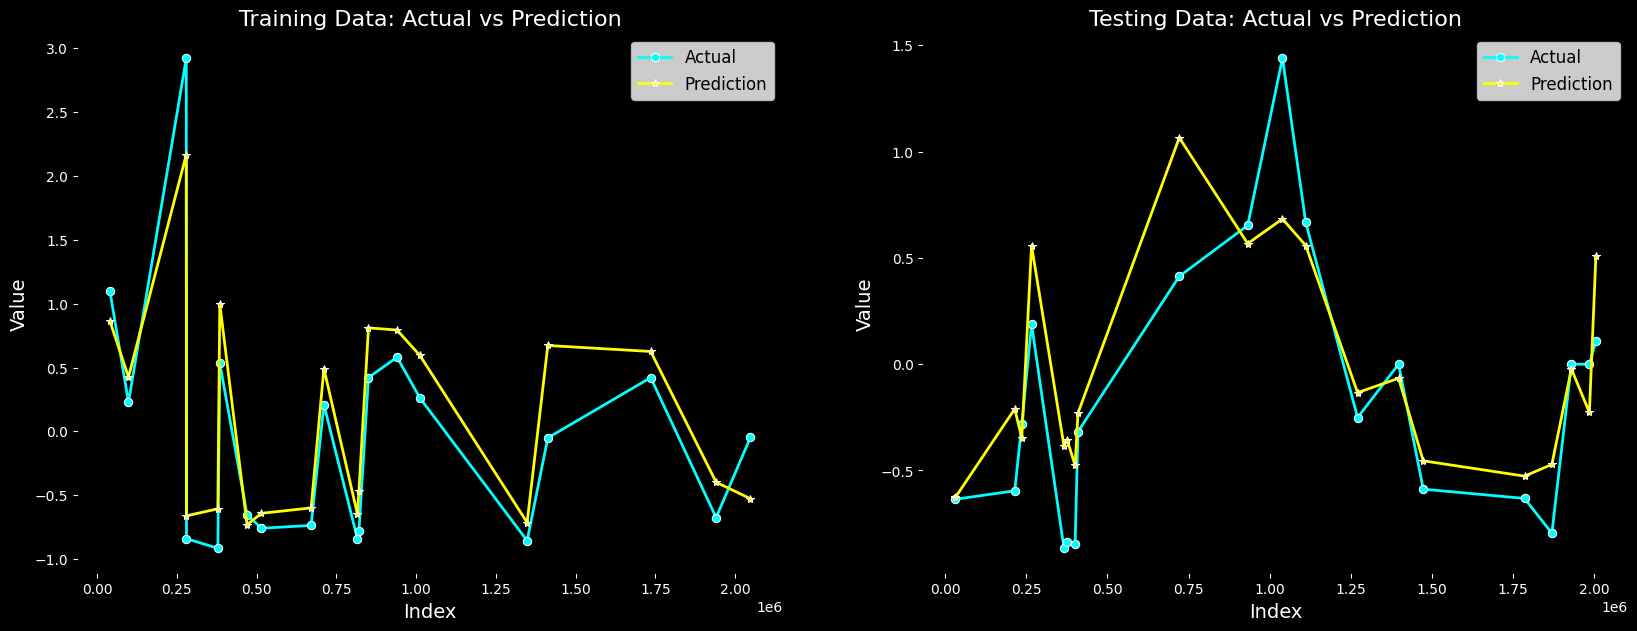

In [36]:


# Create DataFrames for Training and Testing
train_pred_data = pd.DataFrame({"actual": y_train, "pred": tr_pred})
test_pred_data = pd.DataFrame({"actual": y_test, "pred": ts_pred})

# Select the first 20 values for both
train_pred_20 = train_pred_data.head(20)
test_pred_20 = test_pred_data.head(20)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.patch.set_facecolor('black')  # Set background color for the figure

# ---- Training Data Plot ----
axes[0].set_facecolor('black')
sns.lineplot(data=train_pred_20, x=train_pred_20.index, y='actual', 
             marker='o', label="Actual", color='cyan', linewidth=2, ax=axes[0])
sns.lineplot(data=train_pred_20, x=train_pred_20.index, y='pred', 
             marker='*', label="Prediction", color='yellow', linewidth=2, ax=axes[0])
axes[0].set_title("Training Data: Actual vs Prediction", fontsize=16, color="white")
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].legend(fontsize=12, loc="upper right")
axes[0].set_xlabel("Index", fontsize=14, color="white")
axes[0].set_ylabel("Value", fontsize=14, color="white")

# ---- Testing Data Plot ----
axes[1].set_facecolor('black')
sns.lineplot(data=test_pred_20, x=test_pred_20.index, y='actual', 
             marker='o', label="Actual", color='cyan', linewidth=2, ax=axes[1])
sns.lineplot(data=test_pred_20, x=test_pred_20.index, y='pred', 
             marker='*', label="Prediction", color='yellow', linewidth=2, ax=axes[1])
axes[1].set_title("Testing Data: Actual vs Prediction", fontsize=16, color="white")
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].legend(fontsize=12, loc="upper right")
axes[1].set_xlabel("Index", fontsize=14, color="white")
axes[1].set_ylabel("Value", fontsize=14, color="white")

plt.show()


### 🔍 Hint:
🔍 **Analysis of  Results Training vs. Testing Fit**:

- R_2 score of 0.75 indicates that **model explains 75% of the variance in the target variable**, which is decent but could be improved.


The cyan (actual) and yellow (predicted) lines are relatively close, meaning your model is capturing patterns well.
However, some points show large deviations, which could indicate overfitting or underfitting.
Possible Overfitting?

If your test R_2 score is significantly lower than train R_2, the model is overfitting.
but both scores are close (e.g., 0.75 for both), it's a good fit.


** MODEL IS GOOD BUT WE NEED SOME MORE ACCURAY SO WE CAN TRY WITH ANOTHER MODEL**

***SO WE CAN TRY WITH PolynomialFeatures***
-

In [37]:
# PolynomialFeatures under Linear Regression (implement the model)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

#To fit the ploy_model
poly_model.fit(X_train, y_train)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [38]:
#model will predict the training data
ploy_tr_pred = poly_model .predict(X_train)

#model will predict the testing data
ploy_ts_pred = poly_model .predict(X_test)

***error metrices for ploynoimal training data:***
-

In [39]:
# error metrices  for ploynoimal training data
ploy_MAE_TR=mean_squared_error( y_train,ploy_tr_pred)
ploy_RMAE_TR= root_mean_squared_error( y_train,ploy_tr_pred)
ploy_r2_SCORE_TR = r2_score(y_train,ploy_tr_pred )
ploy_MODEL_SCORE_TR = poly_model.score(X_train,y_train)
print(f"ERROR METRICS FOR POLYNOMILAL_MODEL TRAINING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TRAINING DATA: {ploy_MAE_TR}\n"
      f"ROOT MEAN SQUARED ERROR FOR TRAINING DATA: {ploy_RMAE_TR}\n"
      f"R² SCORE FOR TRAINING DATA: {ploy_r2_SCORE_TR}\n"
      f"MODEL SCORE FOR TRAINING DATA: {ploy_MODEL_SCORE_TR}")


ERROR METRICS FOR POLYNOMILAL_MODEL TRAINING DATA:
MEAN ABSOLUTE ERROR FOR TRAINING DATA: 0.18865600963342088
ROOT MEAN SQUARED ERROR FOR TRAINING DATA: 0.4343454956983218
R² SCORE FOR TRAINING DATA: 0.8113222496912981
MODEL SCORE FOR TRAINING DATA: 0.8113222496912981


***error metrices  for ploynoimal testing data:***
-


In [40]:

# error metrices  for ploynoimal testing data
ploy_MAE_TS=mean_squared_error( y_test,ploy_ts_pred)
ploy_RMAE_TS= root_mean_squared_error( y_test,ploy_ts_pred)
ploy_r2_SCORE_TS = r2_score(y_test,ploy_ts_pred )
ploy_MODEL_SCORE_TS = poly_model.score(X_test,y_test)
print(f"ERROR METRICS FOR POLYNOMILAL_MODEL TESTING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TESTING DATA: {ploy_MAE_TS}\n"
      f"ROOT MEAN SQUARED ERROR FOR TESTING DATA: {ploy_RMAE_TS}\n"
      f"R² SCORE FOR TESTING DATA: {ploy_r2_SCORE_TS}\n"
      f"MODEL SCORE FOR TESTING DATA: {ploy_MODEL_SCORE_TS}")


ERROR METRICS FOR POLYNOMILAL_MODEL TESTING DATA:
MEAN ABSOLUTE ERROR FOR TESTING DATA: 0.18798883590424095
ROOT MEAN SQUARED ERROR FOR TESTING DATA: 0.43357679354901013
R² SCORE FOR TESTING DATA: 0.8120976379578191
MODEL SCORE FOR TESTING DATA: 0.8120976379578191


***There is some point of improved in the R_2 socre before r_2 is 0.75 and after ploynominal features is 0.81***
-



**so we can apply  penalty on the model**:
-


In [41]:
# implement the model with ridge
ridge_model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=1.0))

# To fit the model under ridge 
ridge_model.fit(X_train, y_train)

# print the r_2 score result for both traning and testing
print(f"Ridge R_2 score for Traning: {ridge_model.score(X_train, y_train)}\n"
      f"Ridge R_2 score for Testing: {ridge_model.score(X_test, y_test)}")


Ridge R_2 score for Traning: 0.8310456111462492
Ridge R_2 score for Testing: 0.8314220296913117


***After apply the penalty on the model is some better imporvement in R_2 score before R_2 is 0.81 and after apply penlaty R-2 score is 0.83***
-



***GRADIENT BOOSTING MODEL***
-

In [42]:
# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Model to be tranined
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [43]:
#model will predict the training data
gbr_tr_pred = gbr.predict(X_train)

#model will predict the testing data
gbr_ts_pred = gbr.predict(X_test)

***error metrices for gradient boosting model traning data***
-

In [44]:
# error metrices for gradient boosting traning data
gbr_MAE_TR=mean_squared_error( y_test,gbr_ts_pred)
gbr_RMAE_TR= root_mean_squared_error( y_test,gbr_ts_pred)
gbr_r2_SCORE_TR = r2_score(y_test,gbr_ts_pred)
gbr_MODEL_SCORE_TR = gbr.score(X_test,y_test)
print(f"ERROR METRICS FOR  GRADIENT BOOSTING TRANING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TRANING DATA: {gbr_MAE_TR}\n"
      f"ROOT MEAN SQUARED ERROR FOR TRANING DATA: {gbr_RMAE_TR}\n"
      f"R_2 SCORE FOR TRANING DATA: {gbr_r2_SCORE_TR}\n"
      f"MODEL SCORE FOR TRANING DATA: {gbr_MODEL_SCORE_TR}")

ERROR METRICS FOR  GRADIENT BOOSTING TRANING DATA:
MEAN ABSOLUTE ERROR FOR TRANING DATA: 0.15703887504814495
ROOT MEAN SQUARED ERROR FOR TRANING DATA: 0.396281307972184
R_2 SCORE FOR TRANING DATA: 0.8430333619969629
MODEL SCORE FOR TRANING DATA: 0.8430333619969629


***error metrices for gradient boosting model testing data***
-

In [45]:
# error metrices for gradient boostinng testing data
gbr_MAE_TS=mean_squared_error( y_test,gbr_ts_pred)
gbr_RMAE_TS= root_mean_squared_error( y_test,gbr_ts_pred)
gbr_r2_SCORE_TS = r2_score(y_test,gbr_ts_pred)
gbr_MODEL_SCORE_TS = gbr.score(X_test,y_test)
print(f"ERROR METRICS FOR  GRADIENT BOOSTING_MODEL TESTING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TESTING DATA: {gbr_MAE_TS}\n"
      f"ROOT MEAN SQUARED ERROR FOR TESTING DATA: {gbr_RMAE_TS}\n"
      f"R_2 SCORE FOR TESTING DATA: {gbr_r2_SCORE_TS}\n"
      f"MODEL SCORE FOR TESTING DATA: {gbr_MODEL_SCORE_TS}")

ERROR METRICS FOR  GRADIENT BOOSTING_MODEL TESTING DATA:
MEAN ABSOLUTE ERROR FOR TESTING DATA: 0.15703887504814495
ROOT MEAN SQUARED ERROR FOR TESTING DATA: 0.396281307972184
R_2 SCORE FOR TESTING DATA: 0.8430333619969629
MODEL SCORE FOR TESTING DATA: 0.8430333619969629


***Before using gradient Boosting model R_2 score is 0.83 and after using gradient Boosting model R_2 socre is 0.84 we can some improment in the R-2 score***
-

***ENSEMBLE MODEL RANDOM FOREST REGRESSOR***
-

In [46]:
# implement the Ensemble model

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# now we can try with number of estimators is 10

#To fit the model under random forest
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [47]:
#model will predict the training data
rand_tr_pred =  rf_model.predict(X_train)

#model will predict the testing data
rand_ts_pred = rf_model.predict(X_test)

***error metrices  for random traning data:***
-


In [48]:
# error metrices  for random forest testing data
rad_MAE_TR=mean_squared_error( y_train,rand_tr_pred)
rad_RMAE_TR= root_mean_squared_error( y_train,rand_tr_pred)
rad_r2_SCORE_TR = r2_score(y_train,rand_tr_pred)
rad_MODEL_SCORE_TR = rf_model.score(X_train,y_train)
print(f"ERROR METRICS FOR RANDOM FOREST_MODEL TESTING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TESTING DATA: {rad_MAE_TR}\n"
      f"ROOT MEAN SQUARED ERROR FOR TESTING DATA: {rad_RMAE_TR}\n"
      f"R_2 SCORE FOR TESTING DATA: {rad_r2_SCORE_TR}\n"
      f"MODEL SCORE FOR TESTING DATA: {rad_MODEL_SCORE_TR}")


ERROR METRICS FOR RANDOM FOREST_MODEL TESTING DATA:
MEAN ABSOLUTE ERROR FOR TESTING DATA: 0.006429142773376822
ROOT MEAN SQUARED ERROR FOR TESTING DATA: 0.08018193545541803
R_2 SCORE FOR TESTING DATA: 0.9935701163336845
MODEL SCORE FOR TESTING DATA: 0.9935701163336845


***error metrices  for random forest testing data:***
-


In [49]:
# error metrices  for random forest testing data
rad_MAE_TS=mean_squared_error( y_test,rand_ts_pred)
rad_RMAE_TS= root_mean_squared_error( y_test,rand_ts_pred)
rad_r2_SCORE_TS = r2_score(y_test,rand_ts_pred)
rad_MODEL_SCORE_TS = rf_model.score(X_test,y_test)
print(f"ERROR METRICS FOR RANDOM FOREST_MODEL TESTING DATA:\n"
      f"MEAN ABSOLUTE ERROR FOR TESTING DATA: {rad_MAE_TS}\n"
      f"ROOT MEAN SQUARED ERROR FOR TESTING DATA: {rad_RMAE_TS}\n"
      f"R_2 SCORE FOR TESTING DATA: {rad_r2_SCORE_TS}\n"
      f"MODEL SCORE FOR TESTING DATA: {rad_MODEL_SCORE_TS}")


ERROR METRICS FOR RANDOM FOREST_MODEL TESTING DATA:
MEAN ABSOLUTE ERROR FOR TESTING DATA: 0.0340911665825404
ROOT MEAN SQUARED ERROR FOR TESTING DATA: 0.1846379337583163
R_2 SCORE FOR TESTING DATA: 0.9659245151722954
MODEL SCORE FOR TESTING DATA: 0.9659245151722954


***FROM RANDOM FOREST MODEL WE CAN IDETIFIY THE FEATURES IMPORTANCE CLOUMNS***.
-

                 Feature  Importance
6         Sub_metering_3    0.424855
4         Sub_metering_1    0.172278
5         Sub_metering_2    0.132440
1                   Time    0.089403
0                   Date    0.048251
3                Voltage    0.039555
8                  month    0.032868
2  Global_reactive_power    0.031142
7                    day    0.029210


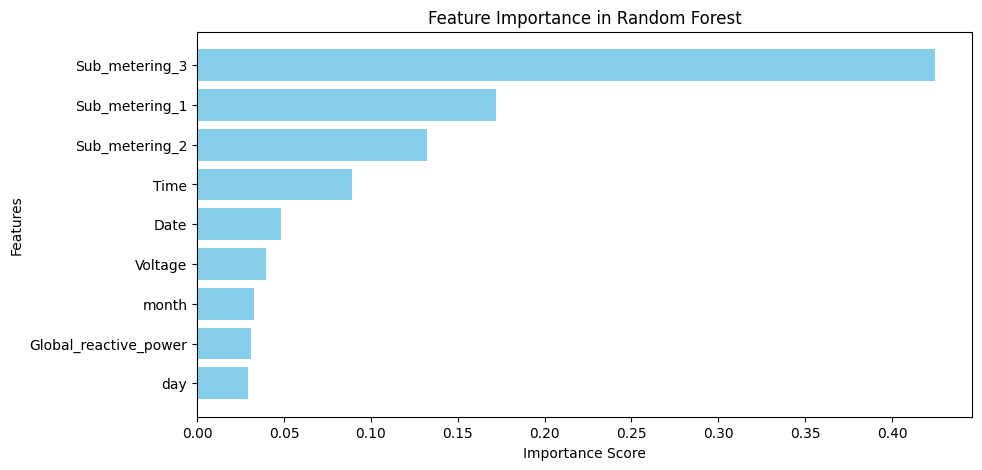

In [50]:
# Get feature importances
feature_importance = rf_model.feature_importances_

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


**we can plot LINE PLOT FOR TRAINING AND TESTING DATA FOR RANDOM FOREST MODEL**
-

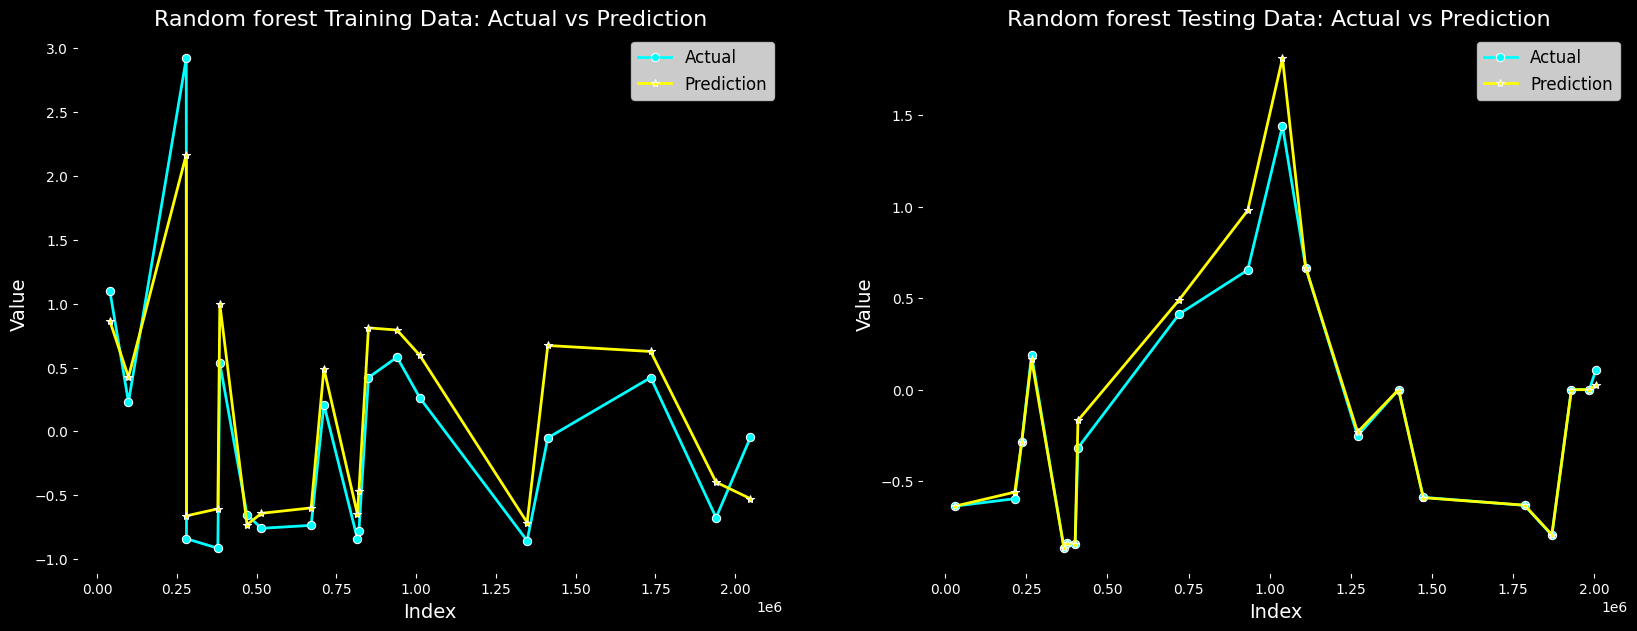

In [51]:

# Create DataFrames for Training and Testing
rnd_train_pred_data = pd.DataFrame({"actual": y_train, "pred": rand_tr_pred })
rnd_test_pred_data = pd.DataFrame({"actual": y_test, "pred": rand_ts_pred })

# Select the first 20 values for both
rnd_train_pred_20 = rnd_train_pred_data.head(20)
rnd_test_pred_20 = rnd_test_pred_data.head(20)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.patch.set_facecolor('black')  # Set background color for the figure

# ---- Training Data Plot ----
axes[0].set_facecolor('black')
sns.lineplot(data=rnd_train_pred_20, x=rnd_train_pred_20.index, y='actual', 
             marker='o', label="Actual", color='cyan', linewidth=2, ax=axes[0])
sns.lineplot(data=train_pred_20, x=rnd_train_pred_20.index, y='pred', 
             marker='*', label="Prediction", color='yellow', linewidth=2, ax=axes[0])
axes[0].set_title("Random forest Training Data: Actual vs Prediction", fontsize=16, color="white")
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].legend(fontsize=12, loc="upper right")
axes[0].set_xlabel("Index", fontsize=14, color="white")
axes[0].set_ylabel("Value", fontsize=14, color="white")

# ---- Testing Data Plot ----
axes[1].set_facecolor('black')
sns.lineplot(data=rnd_test_pred_20, x=rnd_test_pred_20.index, y='actual', 
             marker='o', label="Actual", color='cyan', linewidth=2, ax=axes[1])
sns.lineplot(data=rnd_test_pred_20, x=rnd_test_pred_20.index, y='pred', 
             marker='*', label="Prediction", color='yellow', linewidth=2, ax=axes[1])
axes[1].set_title(" Random forest Testing Data: Actual vs Prediction", fontsize=16, color="white")
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].legend(fontsize=12, loc="upper right")
axes[1].set_xlabel("Index", fontsize=14, color="white")
axes[1].set_ylabel("Value", fontsize=14, color="white")

plt.show()
